<br><img src="Grenoble INP - Ense3.png" style="width:342px;height:131px"/>
<br>
 ---
 
 
<h1><center>Dynamic Models for Building Energy Management</center></h1>
<h3><center> Antonin ANDRÉ - Guillaume DAUENDORFFER - Emma HOAREAU - Kelian JAMBU</center></h3>

---


## 1) Model

### Plan of a simple building

Here is the building design we chose:

<img src="Indoorair1.jpg" style="width:351px;height:365px"/>
<i><center>Fig. 1 - Planview of the building</center></i>
<br>
We decided to model our building with two identical rooms separated by a common wall. The surface of the wall in each room 9 m²  and the volume contained in one room is 27 m3. 

We present below the full thermal model:
<img src="schema-complet4.png"/>
<i><center>Fig. 2 - Thermal Model</center></i>
<br>

### Hypothesis for boundary conditions, windows, doors, and wall composition.
<p style='text-align: justify;'> 
<br>We chose walls consisting of an exterior layer of concrete and an interior layer of insulation. As for the door, we chose an oak wood door which allowed us to easily find the sizes characterizing it on the internet. The door is 2 m².
<br>The wall between the two houses is made of a layer of concrete surrounded by insulation so that each house is insulated in the same way. The surface of the wall is 9 m²  and the volume contained in one piece is 27 m3. 
The windows are single glazed, they are only considered to be made of glass.
The following table gathers the different constants we took to do our modelisation. 
</p>


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import dm4bem
import tuto

Sw = 9
Sd = 2
V = 27
V_air = 5*V/3600

rhoC_cC = 2.5*10**6
rhoI_cI = 2.0*10**6
rhoG_cG = 2.0*10**6
rho_air = 1.225
rho_wood = 500

c_air = 1004
c_wood = 2000


lmc = 2
lmi = 0.04
lmg = 1.2
lmd = 0.06

Wc = 0.2
Wi = 0.08
Wg = 0.01
Wd = 0.1

ho = 10
hi = 4

Kp = 1000

To = 20
Ti_cvc1 = 50
Ti_cvc2 = 15

### Adjancy matrix A, the conductance matrix G and the capacity matrix C.
<p style='text-align: justify;'> 
<br>The adjacency matrix A presents how the temperature nodes are connected by branches of heat flow. In our case, the matrix case is composed of 56 lines that correspond to the number of flow branches and 43 columns that correspond to the number of temperature nodes. For an element of the adjacency matrix (m,n), we fill the adjacency matrix by entering 1 if the flow enters into the node n and -1 if they are not connected to each other. We obtain the following matrix for our modelisation :</p>

In [5]:
A = np.zeros((56,43))

A[0][0] = 1

A[1][34] = 1
A[1][0] = -1

A[2][13] = 1
A[2][1] = -1

A[3][2] = 1

A[4][3] =1
A[4][2] = -1

A[5][4] = 1
A[5][3] = -1

A[6][4] = -1
A[6][35] = 1

A[7][5] = 1

A[8][6] = 1
A[8][5] = -1

A[9][7] = 1
A[9][6] = -1

A[10][36] = 1
A[10][7] = -1

A[11][8] = 1

A[12][37] = 1
A[12][8] = -1

A[13][9] = -1
A[13][13] = 1

A[14][10] = 1

A[15][11] = 1
A[15][10] = -1

A[16][11] = -1
A[16][31] = 1

A[17][12] = 1
A[17][31] = -1

A[18][13] = 1
A[18][12] = -1

A[19][13] = 1

A[20][13] = 1

A[21][13] = 1
A[21][14] = -1

A[22][14] = 1
A[22][15] = -1

A[23][15] = 1
A[23][16] = -1

A[24][16] = 1
A[24][17]=-1

A[25][17] = 1
A[25][38] = -1

A[26][18] = 1

A[27][18] = 1
A[27][33] = -1

A[28][39]=1
A[28][19]=-1

A[29][19]=1

A[30][40]=1
A[30][22]=-1

A[31][22]=1
A[31][21]=-1

A[32][21]=1
A[32][20]=-1

A[33][20]=1

A[34][41]=1
A[34][25]=-1

A[35][25]=1
A[35][24]=-1

A[36][24]=1
A[36][23]=-1

A[37][23]=1

A[38][18]=1
A[38][27]=-1

A[39][42]=1
A[39][26]=-1

A[40][26]=1

A[41][18]=1
A[41][30]=-1

A[42][30]=1
A[42][32]=-1

A[43][32]=1
A[43][29]=-1

A[44][29]=1
A[44][28]=-1

A[45][28]=1

A[46][18]=1

A[47][34]=-1
A[47][1]=1

A[48][35]=-1
A[48][13]=1

A[49][36]=-1
A[49][13]=1

A[50][37]=-1
A[50][9]=1

A[51][38]=-1
A[51][18]=1

A[52][39]=-1
A[52][33]=1

A[53][40]=-1
A[53][18]=1

A[54][41]=-1
A[54][18]=1

A[55][42]=-1
A[55][27]=1

print("Matrice A: \n", A)

Matrice A: 
 [[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]


<p style='text-align: justify;'> 
The conductance matrix G is a diagonal matrix which contains the different  conductances of our modelisation. There are nq lines and nq columns with nq the number of flow branches. To fill our G matrix, we use the different conductance constants computed before. We obtain the following conductance matrix G for our model:</p>

In [7]:
Gc = lmc*Sw/Wc
Gi = lmi*Sw/Wi
Gcd = lmc*(Sw-Sd)/Wc
Gid = lmi*(Sw-Sd)/Wi
Gg = lmg*Sw/Wg
Gd = lmd*Sd/Wd
G_airo = ho*Sw
G_airi = hi*Sw
G_airi_withoutd = hi * (Sw-Sd)
G_airo_withoutd = ho * (Sw-Sd)
G_airid = hi*Sd
G_airod = ho*Sd 
G_vent = rho_air*V_air*c_air
G_cvc = Kp


G = [0 for i in range(56)]
G[0] = G_airo
G[1] = Gg/2
G[2] = G_airi
G[3] = G_airo
G[4] = Gc/2
G[5] = Gc/2+Gi/2
G[6] = Gi/2
G[7] = G_airo_withoutd
G[8] = Gcd/2
G[9] = Gcd/2 + Gid/2
G[10] = Gid/2 
G[11] = G_airod
G[12] = Gd/2
G[13] = G_airid
G[14] = G_airo
G[15] = Gc/2
G[16] = Gc/2 + Gi/2
G[17] = Gi/2
G[18] = G_airi
G[19] = G_vent
G[20] = G_cvc
G[21] = G_airi
G[22] = Gi/2
G[23] = Gi/2 + Gc/2
G[24] = Gc/2 + Gi/2
G[25] = Gi/2
G[26] = G_cvc
G[27] = G_airi
G[28] = Gg/2
G[29] = G_airo
G[30] = Gi/2
G[31] = Gi/2 + Gc/2
G[32] = Gc/2
G[33] = G_airo
G[34] = Gid/2
G[35] = Gid/2 + Gcd/2
G[36] = Gcd/2
G[37] = G_airo_withoutd

G[38] = G_airid
G[39] = Gd/2
G[40] = G_airod
G[41] = G_airi 
G[42] = Gi/2
G[43] = Gc/2 + Gi/2
G[44] = Gc/2
G[45] = G_airo
G[46] = G_vent
G[47] = Gg/2
G[48] = G_airi
G[49] = G_airi_withoutd
G[50] = Gd/2
G[51] = G_airi
G[52] = Gg/2
G[53] = G_airi
G[54] = G_airi_withoutd 
G[55] = Gd/2

G = np.diag(G)

print("Matrice G: \n", G)

Matrice G: 
 [[ 90.    0.    0.  ...   0.    0.    0. ]
 [  0.  540.    0.  ...   0.    0.    0. ]
 [  0.    0.   36.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...  36.    0.    0. ]
 [  0.    0.    0.  ...   0.   28.    0. ]
 [  0.    0.    0.  ...   0.    0.    0.6]]


<p style='text-align: justify;'> 
Finally, the capacity matrix C is a diagonal matrix which represents the different capacities contained in our model. The number of columns correspond to the number of temperature nodes
</p>

In [11]:
Cc = rhoC_cC*Wc*Sw
Ci = rhoI_cI*Wi*Sw
Cg = rhoG_cG*Wg*Sw
C_air = rho_air*c_air*V
Cd = rho_wood*c_wood*Wd*Sd

C = [0 for i in range(43)]
C[34] = Cg
C[3] = Cc
C[4] = Ci
C[6] = Cc
C[7] = Ci
C[37] = Cd
C[11] = Cc
C[31] = Ci
C[15] = Ci
C[16] = Cc
C[17] = Ci
C[39] = Cg
C[13] = C_air
C[22] = Ci
C[21] = Cc
C[25] = Ci
C[42] = Cd
C[24] = Cc
C[32] = Ci
C[29] = Cc
C[18] = C_air

C = np.diag(C)

print("Matrice C: \n", C)

Matrice C: 
 [[     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0. 200000.]]


## 2) Pyhton implementation: steady-state

### Implementation of matrices A, G, and C.

cf part one 

### Solar flows.

In [14]:
alpha_concrete = 0.6
alpha_wood = 0.4
alpha_glass = 0.01
alpha_iso = 0.5
tau_glass = 0.9
Q_day = 30
phi_o = alpha_concrete*Sw*Q_day
phi_i = alpha_iso*tau_glass*Q_day*Sw
Q_aux = 100

### Input vectors b and f in time

In [10]:
f=np.zeros(43)
f[0]=phi_o
f[1]=phi_i
f[2]=phi_o
f[35]=phi_i
f[5]=phi_o
f[36]=phi_i
f[8]=phi_o
f[9]=phi_i
f[10]=phi_o
f[12]=phi_i
f[38]=phi_i
f[14]=phi_i
f[19]=phi_o
f[33]=phi_i
f[20]=phi_o
f[40]=phi_i
f[23]=phi_o
f[41]=phi_i
f[26]=phi_o
f[27]=phi_i
f[28]=phi_o
f[30]=phi_i
f[13]=Q_aux
f[18]=Q_aux

b=np.zeros(56)
b[0]=To
b[3]=To
b[7]=To
b[11]=To
b[14]=To
b[19]=To
b[20]=Ti_cvc1
b[26]=Ti_cvc2
b[29]=To
b[33]=To
b[37]=To
b[40]=To
b[45]=To
b[46]=To

print("Vector f:\n", f)
print("\nVector b:\n", b)

Vector f:
 [162.  121.5 162.    0.    0.  162.    0.    0.  162.  121.5 162.    0.
 121.5 100.  121.5   0.    0.    0.  100.  162.  162.    0.    0.  162.
   0.    0.  162.  121.5 162.    0.  121.5   0.    0.  121.5   0.  121.5
 121.5   0.  121.5   0.  121.5 121.5   0. ]

Vector b:
 [20.  0.  0. 20.  0.  0.  0. 20.  0.  0.  0. 20.  0.  0. 20.  0.  0.  0.
  0. 20. 50.  0.  0.  0.  0.  0. 15.  0.  0. 20.  0.  0.  0. 20.  0.  0.
  0. 20.  0.  0. 20.  0.  0.  0.  0. 20. 20.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [17]:
y=np.ones(43)
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])


## Steady-State response

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)


print(np.array_str(yss, precision=3, suppress_small=True))
print("\n")
print(np.array_str(ytc, precision=3, suppress_small=True))
print('\nTemperature of left room is ',ytc[13])
print('\nTemperature of right room is ',ytc[18])
print(f'\nMax error in steady-state between thermal circuit and state-space:\
{max(abs(yss - ytc)):.2e}')

[29.671 32.295 22.437 23.71  24.922 22.96  24.252 25.483 28.609 62.515
 22.437 23.71  50.382 48.599 51.059 36.425 35.728 35.031 16.107 21.195
 21.751 21.653 21.56  22.275 22.196 22.121 28.146 31.18  21.751 21.653
 19.604 24.922 21.56  20.994 30.983 50.382 51.323 45.562 20.396 21.094
 19.604 20.544 29.663]


[29.671 32.295 22.437 23.71  24.922 22.96  24.252 25.483 28.609 62.515
 22.437 23.71  50.382 48.599 51.059 36.425 35.728 35.031 16.107 21.195
 21.751 21.653 21.56  22.275 22.196 22.121 28.146 31.18  21.751 21.653
 19.604 24.922 21.56  20.994 30.983 50.382 51.323 45.562 20.396 21.094
 19.604 20.544 29.663]

Temperature of left room is  48.59867603353899

Temperature of right room is  16.10658122853387

Max error in steady-state between thermal circuit and state-space:1.20e-12


# 3) Pyhton implementation: simulation

Maximum time step: 61.01 s


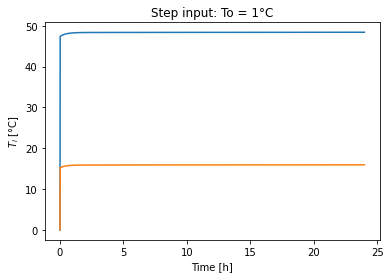

FileNotFoundError: [Errno 2] No such file or directory: 'FRA_Nancy.071800_IWEC.epw'

In [2]:



##Dynamic response
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

dt = dtmax/2
duration = 3600*24*1

n = int(np.floor(duration/dt))

t=np.arange(0,n*dt,dt)

u=np.ones((len(np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])),n))

for i in range(n):
    u[:,i]=np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])




n_tC = As.shape[0]

temp_exp = np.zeros([n_tC,t.shape[0]])
temp_imp = np.zeros([n_tC,t.shape[0]])

I = np.eye(n_tC)

for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])
        
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp[13,:], t / 3600, y_exp[18,:])
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()



##Weather data

filename = 'FRA_Nancy.071800_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (weather.index < end_date)]


surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

t = dt * np.arange(data.shape[0])

u = pd.concat([data['To'], data['To'], data['To'], data['Ti'],
               alpha_concrete * wall['Surface']['Concrete'] * data['Φt1'],
               τ_gSW * α_wSW * wall['Surface']['Glass'] * data['Φt1'],
               data['Qa'],
               α_gSW * wall['Surface']['Glass'] * data['Φt1']], axis=1)

temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]
        
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()